In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [154]:
ds = pd.read_csv("heart.csv")

# EDA

In [155]:
ds.shape

(918, 12)

In [156]:
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [157]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [159]:
ds["HeartDisease"].value_counts()  # Check the distribution of target variable

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [160]:
ds.duplicated().sum()  # Check for duplicate rows

np.int64(0)

In [161]:
ds.isnull().sum()  # Check for missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

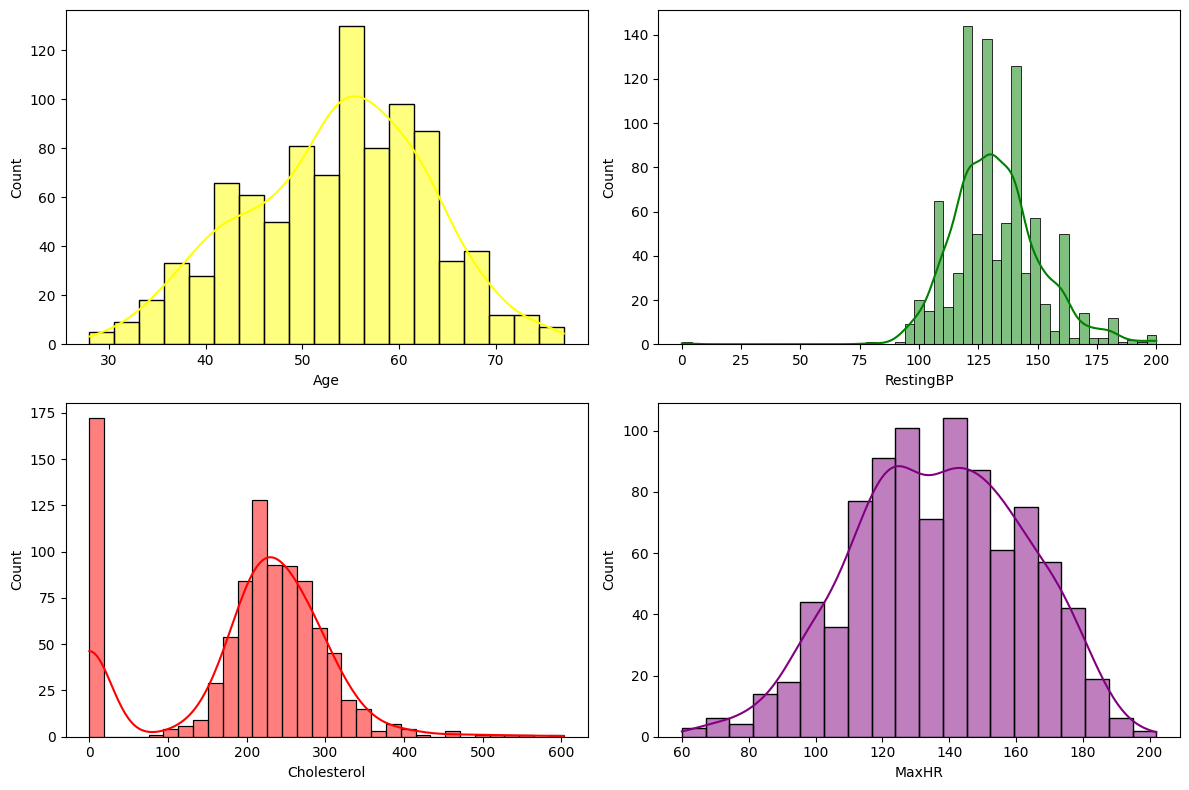

In [162]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

sns.histplot(ds["Age"], kde=True, color="yellow", ax=axes[0, 0]) 


sns.histplot(ds["RestingBP"], kde=True, color="green", ax=axes[0, 1])

sns.histplot(ds["Cholesterol"], kde=True, color="red", ax=axes[1, 0])


sns.histplot(ds["MaxHR"], kde=True, color="purple", ax=axes[1, 1])


plt.tight_layout()
plt.show()

# Handling Unrealistic Values

In [163]:
ds["Cholesterol"].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [164]:
ch_mean = ds.loc[ds["Cholesterol"] != 0, "Cholesterol"].mean() 
ch_mean

np.float64(244.6353887399464)

In [165]:
ds["Cholesterol"] = ds["Cholesterol"].replace(0, ch_mean)
ds["Cholesterol"] = ds["Cholesterol"].round(2)  # Round to 2 decimal places

In [170]:
ds["Cholesterol"].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [166]:
ds["RestingBP"].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64

In [167]:
resting_bp_mean = ds.loc[ds["RestingBP"] != 0, "RestingBP"].mean()

In [168]:
ds["RestingBP"] = ds["RestingBP"].replace(0, resting_bp_mean)
ds["RestingBP"] = ds["RestingBP"].round(2)  # Round to 2 decimal places

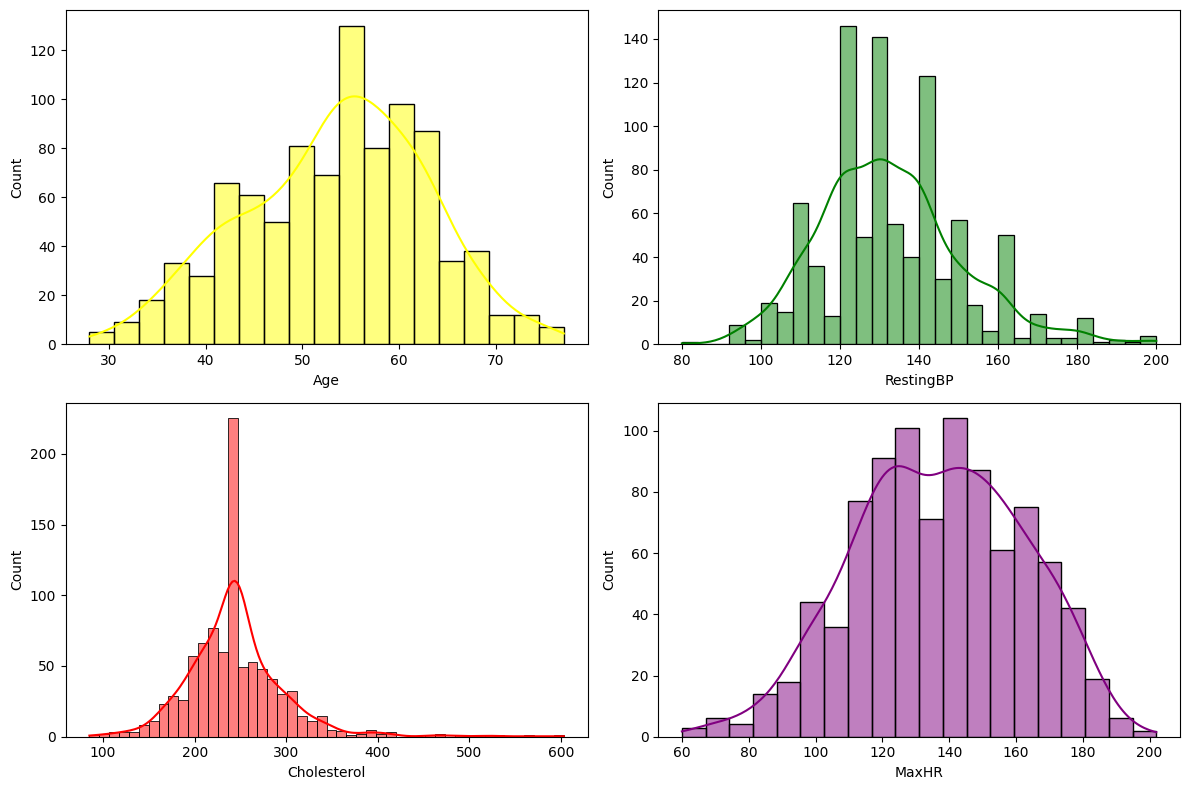

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

sns.histplot(ds["Age"], kde=True, color="yellow", ax=axes[0, 0]) 


sns.histplot(ds["RestingBP"], kde=True, color="green", ax=axes[0, 1])

sns.histplot(ds["Cholesterol"], kde=True, color="red", ax=axes[1, 0])


sns.histplot(ds["MaxHR"], kde=True, color="purple", ax=axes[1, 1])


plt.tight_layout()
plt.show()